In [ ]:
# Importing modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
import matplotlib.pyplot as plt

In [ ]:
# reading dataset
df = pd.read_csv("data.csv")
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",28-02-2021
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",28-02-2021
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",28-02-2021
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",28-02-2021
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",28-02-2021


In [ ]:
# Creating geocode object with Ratelimiter
locator = Nominatim(user_agent="test")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [ ]:
# Creating location column
df['location'] = df['address'].apply(geocode)

In [ ]:
df['city_location'] = df['zip_code'].astype('str') + ', ' + df['city'] + ', ' + df['state'] + ', USA'

In [ ]:
# Filling None values with geocode of city
for idx in df.index:
    if df.iloc[idx]['location'] == None:
        df.at[idx, 'location'] = geocode(df.iloc[idx]['city_location'])

In [ ]:
# Creating point column from location column
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# Removing any entries of None value in point and
df = df.dropna(subset=['point', 'state'])

In [ ]:
# Spliting point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [ ]:
# Checking the dataframe
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,location,city_location,point,latitude,longitude,altitude
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",28-02-2021,"(Miracle Manor, Tucson, Pima County, Arizona, ...","85705, Tucson, AZ, USA","(32.25416446249349, -110.97923458239782, 0.0)",32.254164,-110.979235,0.0
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",28-02-2021,"(Aurora, Arapahoe County, Colorado, 80012, Uni...","80012, Aurora, CO, USA","(39.69645773614379, -104.8439435439977, 0.0)",39.696458,-104.843944,0.0
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",28-02-2021,"(Honolulu, Honolulu County, Hawaii, 96814, Uni...","96814, Honolulu, HI, USA","(21.296404042312332, -157.84507115923296, 0.0)",21.296404,-157.845071,0.0
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",28-02-2021,"(River Oaks Drive, Globe, Calumet City, Thornt...","60409, Calumet City, IL, USA","(41.6010821, -87.5581579, 0.0)",41.601082,-87.558158,0.0
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",28-02-2021,"(Baton Rouge, East Baton Rouge Parish, Louisia...","70836, Baton Rouge, LA, USA","(30.387688478432157, -91.08695006192693, 0.0)",30.387688,-91.086950,0.0


In [ ]:
# mappig dataset with plotly
import plotly.express as px

In [ ]:
fig = px.scatter_geo(df, 
                     # longitude is taken from the df["lon"] columns and latitude from df["lat"]
                     lon=df['longitude'], 
                     lat=df['latitude'], 
                     # choose the map chart's projection
                     projection="natural earth"
                     )


# scatter_geo allow to change the map date based on the information from the df dataframe, but we can separately specify the values that are common to all
# change the size of the markers to 25 and color to red
fig.update_traces(marker=dict(size=10, color="red"))

# fit the map to surround the points
fig.update_geos(fitbounds="locations", showcountries = True)

# add title
fig.update_layout(title = 'Store Map')
fig.write_image("map1.jpeg")
fig.show()

In [ ]:
# Creating a dictionary of states with number of stores
state_count = {}
for idx in df.index:
    state = df['state'][idx]
    if state in state_count: 
        state_count[state] += 1
    else:
        state_count[state] = 1

In [ ]:
# sorting dictionary for plot
state_count = dict(sorted(state_count.items(), key=lambda item: item[1], reverse=True))

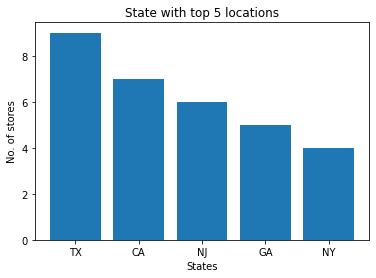

In [ ]:
# Making plot using matplotlib
x = list(state_count.keys())[:5]
y = list(state_count.values())[:5]

plt.bar(x, y)
plt.title("State with top 5 locations")
plt.xlabel("States")
plt.ylabel("No. of stores")
plt.savefig('map2.jpg')

In [ ]:
# Saving df object as pickle
df.to_pickle("data_main.pkl")

In [ ]:
total_store = len(df)
total_state = len(state_count.keys())

In [ ]:
print("So the total number of valid stores are : ", total_store)
print("Total number of states where stores are located : ", total_state)
print("Top 5 states are : ", *x)

So the total number of valid stores are :  56
Total number of states where stores are located :  24
Top 5 states are :  TX CA NJ GA NY
